<h1><center>Assignment 4</center></h1>
<h1><center>Johannes M. Halkenhaeusser</center></h1>
<h1><center>Minerva Schools at KGI</center></h1>
<h1><center>CS156 - Prof. Sterne</center></h1>
<h1><center>Spring 2020</center></h1>



## Analysis


The logistic regression fits weights on each of the components of the input images using the sigmoid function. The output for a single data point lies between 0 and 1 for inputs of the sigmoid function, which has an S-shaped curve that leads to sharp cut-offs. The decision boundary is usually set to at 0.5, and since here we care only about accuracy not about Type 1 vs. Type 2 errors, we will keep it this way.
It performs with perfect accuracy on the training set, which is a clear sign of overfitting and to is expected with the large number of parameters compared with too few observations on these parameters. This overfitting is observed when we look at the test accuracy, which plummets to 59.68%. Quite dramatically, this is just slightly better than pure guess-work. 
A way to prevent overfitting would be to add a regularization into the model. This penalizes extreme weights, which would e.g., indicate if a single parameter was used to "memorize" the classification of each observation. It smoothens the curve that connects the points. Another way to avoid overfitting is to cross-validate and choose the parameters that perform best on the cross-validation. 
The logistic regression classifier takes the longest to run out of all of them because it uses the most input information (a reason against cross-validating and finding the best regularization term). 


While the first model used the raw data we provided to it, using principal component analysis, we can reduce the images down into a model with much fewer parameters. This is done by projecting the data onto the eigenvectors that explain most of the variance in the data. Here we reduced the image down to just 13 components, which means that instead of each image being given by 196608 values, the same image can be roughly represented in just 13 components. Each component can be thought of as a particular feature distinguishing the images, e.g., how blue the shirt is. 
As shown in the figure, the more components (or eigenvectors) we fit, the more of the variance we can explain. At the same time, each additional component has a reduced improvement in the variance. The key is to find the number of components that yields the best trade-off between increasing the number of components (and thus parameters) and explained variance. By adding more components, we increase the number of parameters, which can lead to overfitting as well as slow down the classifier. With just 13 components, the model took almost no time to be trained. However, training the PCA also takes time, which is a factor to be considered. 
The apparent trade-off can be seen at the training accuracy, which is lower than with the raw data (64.17%). However, because there is much less (almost no) overfitting, the PCA-model performs generalizes better (61.54%) on the test data compared to the raw data and the LDA-model. Each component already carries information about the image, which is why the model performs better with more test accuracy than the other models (see below).  

The Linear Discriminant Analysis separates the data according to the variance in the classes, which differentiates it from PCA, which uses just the input data to separate it. The method projects the data so that the difference in classes is most pronounced and uses a linear classifier for its decision boundary. 
The result observed is similar to that of the logistic regression: There is a high training accuracy and a low test score. Again this can be a result of overfitting. 
When looking at the output, we get a warning that the variables are collinear, which means that the predictors are correlated, i.e., one pixel is correlated with another pixel in the image. This means that parameter weights can underestimate the effect of one another. E.g., if an increase in X1 correlates with an increase in X2 and Y2, then a single coefficient can be too small and underestimate the effect of that predictor (gui11aume, 2012).

Raw

Training Accuracy: 	 1.0

Test Accuracy: 	 	 0.5888594164456233

PCA

Training Accuracy: 	 0.6416861826697893

Test Accuracy: 	 	 0.6153846153846154

LDA

Training Accuracy: 	 0.9231850117096019

Test Accuracy: 	 	 0.596816976127321


### Final decision
Overall, the PCA has been the most effective because its test accuracy is the highest and it has the shortest run time. Given that the PCA only has 13 components it should be well within our means to increase the number of components and cross-validate for different regularization terms. This would allow us to build a model that generalizes well, prevents overfitting, and does not take too long to run. 

In [90]:
import numpy as np
import scipy as sp
import scipy.stats as sts
import matplotlib.pyplot as plt

from collections import defaultdict
from glob import glob
import random as rd
import pylab as pl
import pandas as pd
import re
from sklearn import decomposition


from PIL import Image
import PIL.ImageOps

from skimage import io, color
import matplotlib.image as mpimg
from skimage.transform import resize

from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

from sklearn.metrics import classification_report, mean_squared_error

import seaborn as sns
from sklearn.metrics import confusion_matrix

In [2]:
#get all the pathlinks to the data
jersey = glob("/Users/johannes/Desktop/Minerva/CS156/Jersey - n03595614/*")
shirts = glob("/Users/johannes/Desktop/Minerva/CS156/Shirt - n04197391/*")
male = glob("/Users/johannes/Desktop/Minerva/CS156/Man's Clothing - n03746330/*")
female = glob("/Users/johannes/Desktop/Minerva/CS156/Woman's Clothing - n04596852/*")

In [3]:
#import just male and women to make some comparisons
male_ar = [np.array(Image.open(fname)) for fname in male] 
female_ar = [np.array(Image.open(fname)) for fname in female] 

In [26]:
male_ar[0].shape

(343, 400, 3)

In [33]:
transformed_male = []
transformed_female = []

#resize the data and flatten it
def transform(dataset, newlist):
    for i in range(len(dataset)):

        #resize the image
        temp2 = resize(dataset[i], (256, 256), Image.NEAREST)
        #flatten it
        newlist.append(temp2.flatten())
        
#call on functions     
transform(male_ar, transformed_male) 
transform(female_ar, transformed_female)

In [30]:
#get the labels
male_label = ["m"]*len(transformed_male)
female_label = ["f"]*len(transformed_female)

In [34]:
#make final input and label set. 
final_dataset = np.concatenate((transformed_male, transformed_female), axis = 0)
final_labels = np.concatenate((male_label, female_label), axis = 0)

In [50]:
#scale the data using StandardScaler
#StandarScaler normalizes the images by subtracting the mean and dividing by the unit variance. 
scaler = StandardScaler()
scaler.fit(final_dataset)
data_set = scaler.fit_transform(final_dataset)

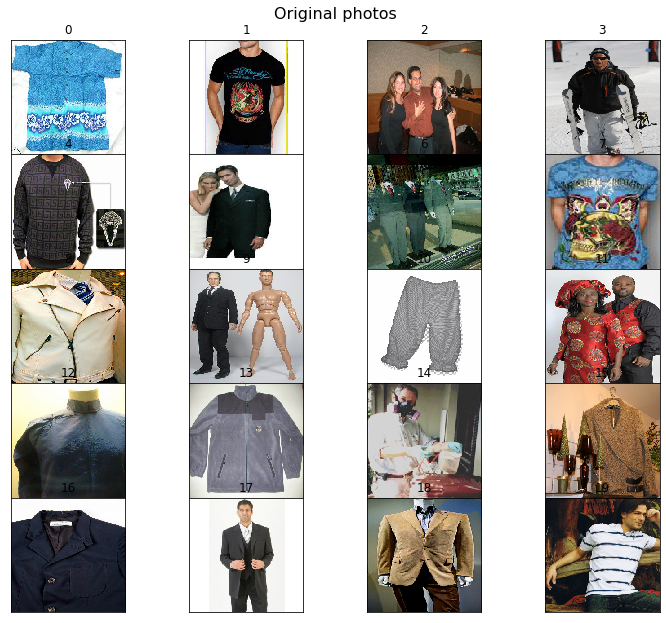

In [92]:
### peak into the data

n_col = 5
n_row = 4
## show the original images
plt.figure(figsize=(2. * n_col, 2.26 * n_row))
plt.suptitle('Original photos', size=16)
for i, comp in enumerate(data_set[:n_col*n_row]):
    plt.subplot(n_col, n_row, i + 1)
    comp = scaler.inverse_transform(comp)
    comp = (comp * 255).astype(np.uint8)
    plt.imshow(comp.reshape(256,256,3))
    plt.title(i)
    plt.xticks(())
    plt.yticks(())
plt.subplots_adjust(0.01, 0.05, 0.99, 0.93, 0.04, 0.)

In [56]:
#split into train and test data set
X_train, X_test, y_train, y_test = train_test_split(data_set, final_labels, test_size=0.15)

In [59]:
print('We have %d training and %d test samples'%(len(X_train), len(X_test)))

We have 2135 training and 377 test samples


### 1. Logistic Regression Classifier

In [60]:
clf = LogisticRegression(random_state=0)
clf.fit(X_train, y_train)

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


1.0
0.596816976127321


Training Accuracy: 	 1.0
Test Accuracy: 	 	 0.5888594164456233


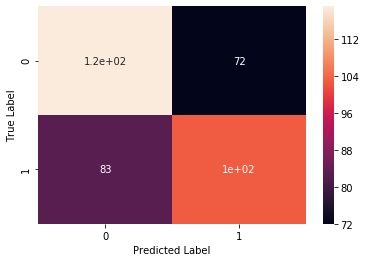

In [125]:
def evaluate_method(model, X_t, y_t, test_info, test_labels):
    
    print('Training Accuracy: \t', model.score(X_t, y_t))
    print('Test Accuracy: \t \t', model.score(test_info, test_labels))
    
    test_predict = model.predict(test_info)

    # Plot confusion matrix
    plt.figure()
    sns.heatmap(confusion_matrix(test_labels, test_predict),annot=True,cbar=True)
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    
evaluate_method(clf, X_train, y_train, X_test, y_test)

## 2. Apply PCA

In [68]:
# Let's find how many components we should use by just applying a PCA with a range of components

#initialize the pca
pca = PCA(whiten=True, copy=True, random_state= 10)
#fit it
pca.fit(X_train)

#get the cumulative 
total = np.cumsum(pca.explained_variance_ratio_)

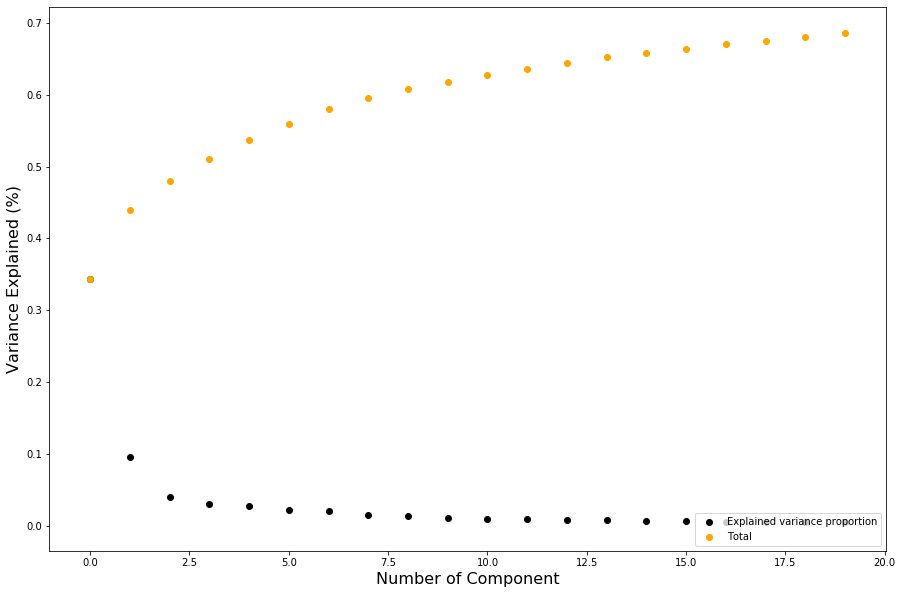

[0.34386811 0.09516613 0.04034394 0.03063867 0.02694703 0.02236879
 0.02085258 0.01474207 0.01276798 0.01053782 0.00960247 0.00877877
 0.00802324 0.00740472 0.00630834 0.00613185 0.00574992 0.00527611
 0.00513759 0.00488276]


In [71]:
plt.figure(figsize=(15, 10))
comp_to_view = 20
#let's plot it
plot_xs = list(range(comp_to_view))


plt.scatter(plot_xs, pca.explained_variance_ratio_[:comp_to_view], color='black', label='Explained variance proportion')
plt.scatter(plot_xs, total[:comp_to_view],color='orange', label='Total')

plt.legend(loc=4)
plt.xlabel('Number of Component', size=16)
plt.ylabel('Variance Explained (%)', size=16)
plt.show()

print(pca.explained_variance_ratio_[:comp_to_view])

In [110]:
#initialize the pca
pca = PCA(n_components = 13, whiten=True, copy=True, random_state= 10)
#fit it
pca.fit(X_train)

reduced = pca.transform(X_train)

In [111]:
pca_lr = LogisticRegression(random_state=0)
pca_lr.fit(reduced, y_train)

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [81]:
reduced_test = pca.transform(X_test)

In [1]:
reduced[0].shape

NameError: name 'reduced' is not defined

Training Accuracy: 	 0.6416861826697893
Test Accuracy: 	 	 0.6153846153846154


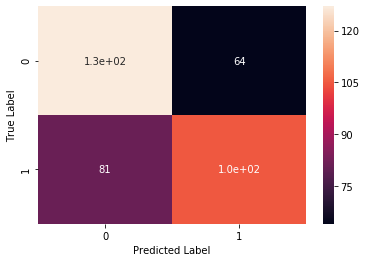

In [123]:
evaluate_method(pca_lr, reduced, y_train, reduced_test, y_test)

## 3. LDA 

In [115]:
LDA_clothes = LDA(n_components = 1) 
LDA_clothes.fit(X_train, y_train)

//anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


LinearDiscriminantAnalysis(n_components=1, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

Training Accuracy: 0.9231850117096019
Test Accuracy: 0.596816976127321


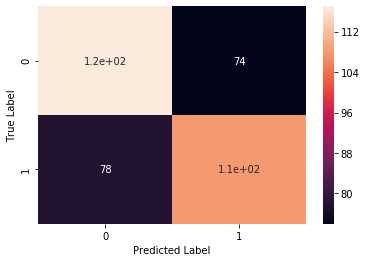

In [98]:
evaluate_method(LDA_clothes, X_train, y_train, X_test, y_test)

Training Accuracy: 	 1.0
Test Accuracy: 	 	 0.5888594164456233
Training Accuracy: 	 0.6416861826697893
Test Accuracy: 	 	 0.6153846153846154
Training Accuracy: 	 0.9231850117096019
Test Accuracy: 	 	 0.596816976127321


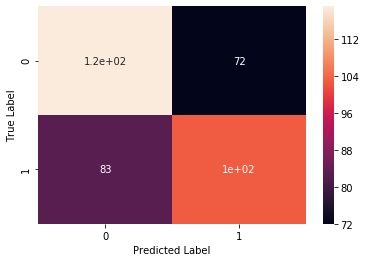

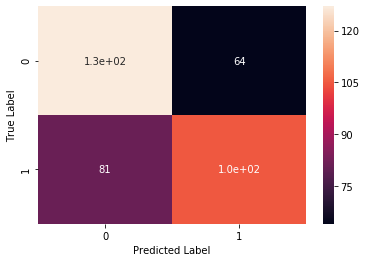

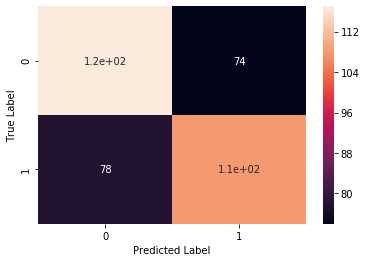

In [126]:
#Cross comparison: 
evaluate_method(clf, X_train, y_train, X_test, y_test)
evaluate_method(pca_lr, reduced, y_train, reduced_test, y_test)
evaluate_method(LDA_clothes, X_train, y_train, X_test, y_test)